In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
import pickle

import Dense
import mse
import ReLU
import Sigmoid

In [2]:
with open('data_train.pickle', 'rb') as d:
    LOADED_DATA = pickle.load(d)

In [3]:
#data preparation

class One_Hot_Encoder:
    def __init__(self, dims):
        self.mat = np.diag(np.ones(dims))
        
    def __call__(self, data):
        return self.mat[int(data)]
    
    
def transform_from_pickle(data):
    encoder = One_Hot_Encoder(10)
    target_after_encoding = [encoder(int(i)) for i in data['target']]
    target = np.array(target_after_encoding)
    return data['data'], target

def train_test_split(data, target, validation_size=0.25, shuffle=True):
    assert len(data) == len(target)
    if shuffle:
        p = np.random.permutation(len(data))
        data = data[p]
        target = target[p]
    partition = int(len(data)*validation_size)
    return (data[:partition], data[partition:],
            target[:partition], target[partition:])

8.0

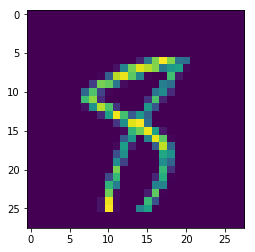

In [4]:
pyplot.imshow(LOADED_DATA['data'][15].reshape(28,28))
LOADED_DATA['target'][15]

In [5]:
class net1:
    def __init__(self):
        self.d1 = Dense.Dense(28*28, 15, 0.1)
        self.a1 = ReLU.ReLU()
        self.d2 = Dense.Dense(15, 15, 0.1)
        self.a2 = ReLU.ReLU()
        self.d3 = Dense.Dense(15, 10, 0.1)
        self.a3 = ReLU.ReLU()
        self.loss = mse.mse()
    
    def loss_(self, x, y):
        return self.loss.forward(x, y)
    
    def forward(self, x, y=None):
        x = self.d1.forward(x)
        x = self.a1.forward(x)
        x = self.d2.forward(x)
        x = self.a2.forward(x)
        x = self.d3.forward(x)
        x = self.a3.forward(x)
        if y is None:
            return x
        return self.loss_(x, y)
    
    def backward(self):
        loss = self.loss.backward()
        loss = self.a3.backward(loss)
        loss = self.d3.backward(loss)
        loss = self.a2.backward(loss)
        loss = self.d2.backward(loss)
        loss = self.a1.backward(loss)
        loss = self.d1.backward(loss)

class net2:
    def __init__(self):
        self.d1 = Dense.Dense(28*28, 10, 0.1)
        self.a1 = Sigmoid.Sigmoid()
        self.loss = mse.mse()
    
    def loss_(self, x, y):
        return self.loss.forward(x, y)
    
    def forward(self, x, y=None):
        x = self.d1.forward(x)
        x = self.a1.forward(x)
        if y is None:
            return x
        return self.loss_(x, y)
    
    def backward(self):
        loss = self.loss.backward()
        loss = self.a1.backward(loss)
        loss = self.d1.backward(loss)



In [6]:
n = net2()
train_losses = []
valid_losses = []
DATA, TARGET = transform_from_pickle(LOADED_DATA)

In [20]:
epochs = 10
for epoch in range(epochs):
    train_data, valid_data, train_target, valid_target = train_test_split(DATA, TARGET)
    loss = 0
    for data, target in zip(train_data, train_target):
        loss += n.forward(data, target)
        n.backward()
    train_losses.append(loss)
    loss = 0
    for data, target in zip(valid_data, valid_target):
        loss += n.forward(data, target)
    valid_losses.append(loss)

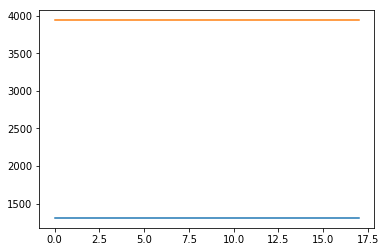

In [18]:
start = 2
pyplot.plot(train_losses[start:])
pyplot.plot(valid_losses[start:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


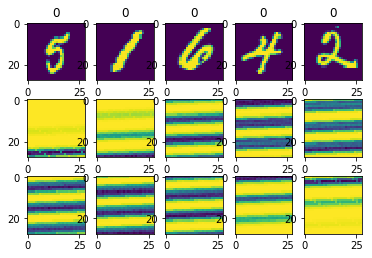

In [32]:
for i in range(5):
    number = np.random.randint(len(LOADED_DATA['data']))
    pyplot.subplot(3,5,i+1)
    pyplot.imshow(LOADED_DATA['data'][number].reshape(28,28))
    pyplot.title(str(np.argmax(n.forward(LOADED_DATA['data'][number]))))
print(n.forward(LOADED_DATA['data'][number]))
for i in range(10):
    pyplot.subplot(3,5,i+6)
    pyplot.imshow(n.d1.mt.reshape(10, 28*28,)[i].reshape(28,28))